## Homework

> Note: sometimes your answer doesn't match one of 
> the options exactly. That's fine. 
> Select the option that's closest to your solution.


### Dataset

In this homework, we will use the Laptops price dataset from [Kaggle](https://www.kaggle.com/datasets/juanmerinobermejo/laptops-price-dataset).

Here's a wget-able [link](https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv):

```bash
wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv
```

The goal of this homework is to create a regression model for predicting the prices (column `'Final Price'`).

### Preparing the dataset 

First, we'll normalize the names of the columns:

```python
df.columns = df.columns.str.lower().str.replace(' ', '_')
```

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv')
df.head(2)

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.0
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.0


In [3]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.head(2)

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.0
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.0


Now, instead of `'Final Price'`, we have `'final_price'`.

Next, use only the following columns:

* `'ram'`,
* `'storage'`,
* `'screen'`,
* `'final_price'`

In [4]:
base = ['ram', 'storage', 'screen', 'final_price']
df = df[base]
df.head(2)

,ram,storage,screen,final_price
0,8,512,15.6,1009.0
1,8,256,15.6,299.0


### EDA

* Look at the `final_price` variable. Does it have a long tail?

In [5]:
df.describe()

,ram,storage,screen,final_price
count,2160.000000,2160.000000,2156.000000,2160.000000
mean,15.413889,596.294444,15.168112,1312.638509
std,9.867815,361.220506,1.203329,911.475417
min,4.000000,0.000000,10.100000,201.050000
25%,8.000000,256.000000,14.000000,661.082500
50%,16.000000,512.000000,15.600000,1031.945000
75%,16.000000,1000.000000,15.600000,1708.970000
max,128.000000,4000.000000,18.000000,7150.470000


<Axes: xlabel='final_price', ylabel='Count'>

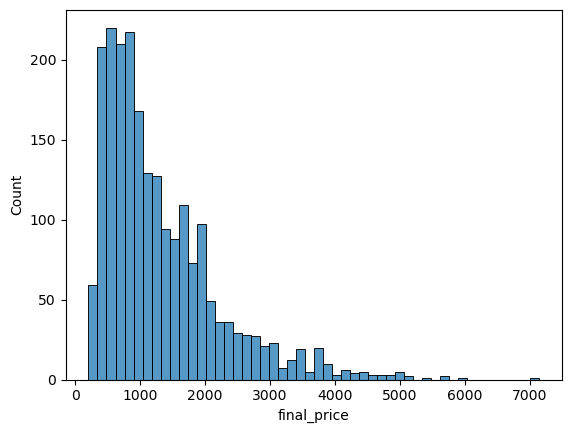

In [6]:
sns.histplot(df.final_price, bins=50)

<Axes: xlabel='final_price', ylabel='Count'>

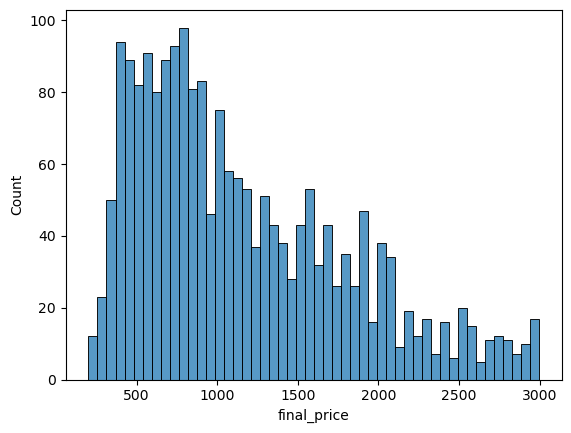

In [7]:
sns.histplot(df.final_price[df.final_price < 3000], bins=50)

In [8]:
price_logs = np.log(df.final_price)

<Axes: xlabel='final_price', ylabel='Count'>

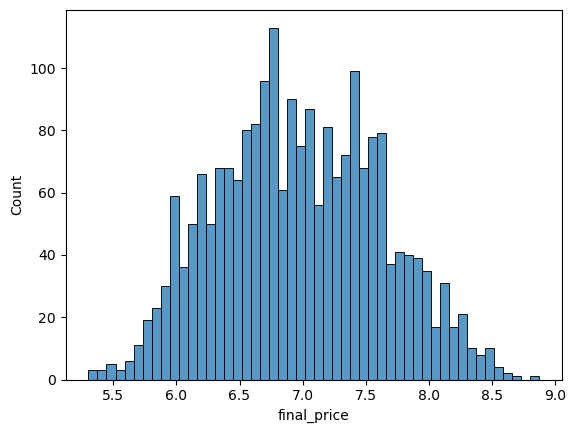

In [9]:
sns.histplot(price_logs, bins=50)

Yes, the *final_price* variable has a long tail.

### Question 1

There's one column with missing values. What is it?

* `'ram'`
* `'storage'`
* `'screen'`
* `'final_price'`

In [10]:
df.isnull().sum()

ram            0
storage        0
screen         4
final_price    0
dtype: int64

The *screen* variable has missing values.
### Question 2

What's the median (50% percentile) for variable `'ram'`?

- 8
- 16
- 24
- 32

In [11]:
print("The median for 'ram' variable is :", df.ram.median())

The median for 'ram' variable is : 16.0


### Prepare and split the dataset

* Shuffle the dataset (the filtered one you created above), use seed `42`.
* Split your data in train/val/test sets, with 60%/20%/20% distribution.

Use the same code as in the lectures

In [12]:
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [13]:
n, n_val, n_test, n_train

(2160, 432, 432, 1296)

In [14]:
idx = np.arange(n)

In [15]:
np.random.seed(42)
np.random.shuffle(idx)

In [16]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [17]:
df_train.head()

,ram,storage,screen,final_price
2079,32,1000,15.6,1123.29
668,4,64,14.1,201.05
2073,32,1000,14.0,997.74
1113,16,512,13.3,1016.00
788,32,1000,16.0,2739.00


In [18]:
len(df_train), len(df_val), len(df_test)

(1296, 432, 432)

In [19]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

### Question 3

* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lessons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using `round(score, 2)`
* Which option gives better RMSE?

Options:

- With 0
- With mean
- Both are equally good

In [20]:
y_train = df_train.final_price.values
y_val = df_val.final_price.values
y_test = df_test.final_price.values

In [21]:
df_train = df_train.drop(columns = 'final_price')
df_val = df_val.drop(columns = 'final_price')
df_test = df_test.drop(columns = 'final_price')

In [22]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [23]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [24]:
def prepare_X(df, fill=0):
    df_fill = df.fillna(fill)
    X_fill = df_fill.values
    return X_fill

In [25]:
X_train_fill_0 = prepare_X(df_train, fill=0)
X_train_fill_mean = prepare_X(df_train, fill=df_train.screen.mean())
X_val_fill_0 = prepare_X(df_val, fill=0)
X_val_fill_mean = prepare_X(df_val, fill=df_train.screen.mean())

In [26]:
w0, w = train_linear_regression(X_train_fill_0, y_train)
y_pred_fill_0 = w0 + X_val_fill_0.dot(w)
print("RMSE_fill_0 :", round(rmse(y_val, y_pred_fill_0), 2))

RMSE_fill_0 : 597.36


In [27]:
w0, w = train_linear_regression(X_train_fill_mean, y_train)
y_pred_fill_mean = w0 + X_val_fill_mean.dot(w)
print("RMSE_fill_mean :", round(rmse(y_val, y_pred_fill_mean), 2))

RMSE_fill_mean : 600.27


### Question 4

* Now let's train a regularized linear regression.
* For this question, fill the NAs with 0. 
* Try different values of `r` from this list: `[0, 0.01, 0.1, 1, 5, 10, 100]`.
* Use RMSE to evaluate the model on the validation dataset.
* Round the RMSE scores to 2 decimal digits.
* Which `r` gives the best RMSE?

If there are multiple options, select the smallest `r`.

Options:

- 0
- 0.01
- 1
- 10
- 100

In [28]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [29]:
for r in [0, 0.01, 1, 10, 100]:
    w0, w = train_linear_regression_reg(X_train_fill_0, y_train, r=r)
    y_pred = w0 + X_val_fill_0.dot(w)
    score = rmse(y_val, y_pred)
    
    print(r, w0, round(score, 2))

0 676.8954853003158 597.36
0.01 676.2736817204283 597.36
1 619.9030834107112 597.21
10 352.79713367677226 597.06
100 66.92071440180858 597.9





### Question 5 

* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: `[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]`.
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores. 
* What's the standard deviation of all the scores? To compute the standard deviation, use `np.std`.
* Round the result to 3 decimal digits (`round(std, 3)`)

What's the value of std?

- 19.176
- 29.176
- 39.176
- 49.176

> Note: Standard deviation shows how different the values are.
> If it's low, then all values are approximately the same.
> If it's high, the values are different. 
> If standard deviation of scores is low, then our model is *stable*.

In [30]:
scores = []
for s in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    idx = np.arange(n)
    np.random.seed(s)
    np.random.shuffle(idx)
    df_train = df.iloc[idx[:n_train]]
    df_val = df.iloc[idx[n_train:n_train+n_val]]
    df_test = df.iloc[idx[n_train+n_val:]]
    y_train = df_train.final_price.values
    y_val = df_val.final_price.values
    y_test = df_test.final_price.values
    df_train = df_train.drop(columns = 'final_price')
    df_val = df_val.drop(columns = 'final_price')
    df_test = df_test.drop(columns = 'final_price')
    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)
    X_train_fill_0 = prepare_X(df_train, fill=0)
    X_val_fill_0 = prepare_X(df_val, fill=0)
    w0, w = train_linear_regression(X_train_fill_0, y_train)
    y_pred_fill_0 = w0 + X_val_fill_0.dot(w)
    score = rmse(y_val, y_pred_fill_0)
    print("RMSE_seed=%s" % s, round(score, 3))
    scores.append(score)

print('Standard deviation of all scores :', np.std(scores).round(3))

RMSE_seed=0 565.452
RMSE_seed=1 636.799
RMSE_seed=2 588.956
RMSE_seed=3 597.815
RMSE_seed=4 571.963
RMSE_seed=5 573.238
RMSE_seed=6 647.344
RMSE_seed=7 550.44
RMSE_seed=8 587.334
RMSE_seed=9 576.102
Standard deviation of all scores : 29.176





### Question 6

* Split the dataset like previously, use seed 9.
* Combine train and validation datasets.
* Fill the missing values with 0 and train a model with `r=0.001`. 
* What's the RMSE on the test dataset?

Options:

- 598.60
- 608.60
- 618.60
- 628.60

In [31]:
df_full_train = pd.concat([df_train, df_val])
df_full_train = df_full_train.reset_index(drop=True)
df_full_train.shape

(1728, 3)

In [32]:
X_full_train = prepare_X(df_full_train, fill=0)
X_full_train

array([[  32. , 1000. ,   15.6],
       [   8. ,  512. ,   13.3],
       [   8. ,  512. ,   15.6],
       ...,
       [   8. ,  256. ,   15.6],
       [  16. ,  512. ,   15.6],
       [  16. ,  512. ,   15.6]])

In [33]:
y_full_train = np.concatenate([y_train, y_val])

In [34]:
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)

In [35]:
X_test = prepare_X(df_test, fill=0)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)
score

608.6099822049533



## Submit the results

* Submit your results here: https://courses.datatalks.club/ml-zoomcamp-2024/homework/hw02
* If your answer doesn't match options exactly, select the closest one